In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
#CHECK THE DATA TYPES AND SHAPES
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
#LOOK FOR MISSING OR DUPLICATE DATA
print(customers.isnull().sum())  # Check missing values
print(customers.duplicated().sum())  # Check duplicates


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0


In [6]:
#BASIC STATS
print(customers.describe())  # Numerical stats
print(products['Category'].value_counts())  # Count of each product category


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [7]:
# EDA

In [9]:
#For Customers:
#Question: How many customers are from each region?

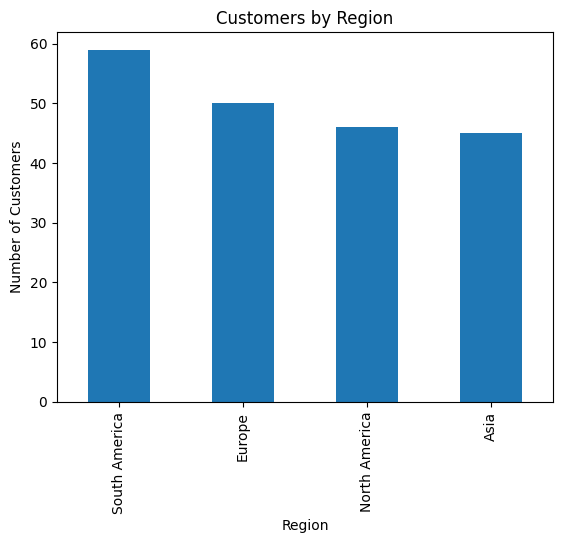

In [10]:
import matplotlib.pyplot as plt
customers['Region'].value_counts().plot(kind='bar', title='Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


In [11]:
#Question: How has the customer base grown over time?

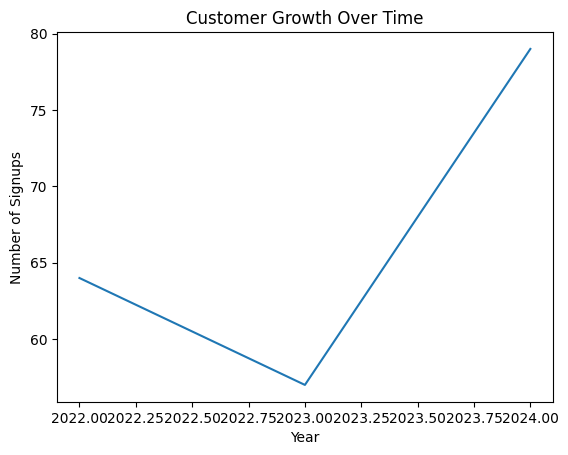

In [12]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupDate'].dt.year.value_counts().sort_index().plot(kind='line', title='Customer Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


In [13]:
#For Products:
#Question: What are the top-selling product categories?

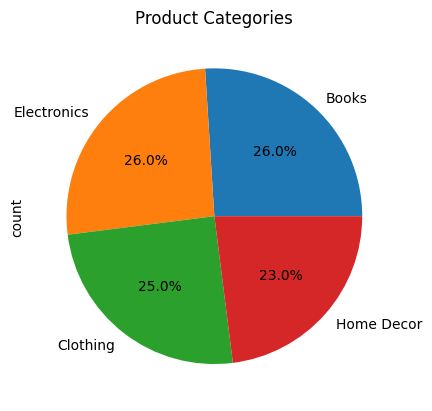

In [14]:
products['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Categories')
plt.show()


In [15]:
#Question: What is the price distribution of products?

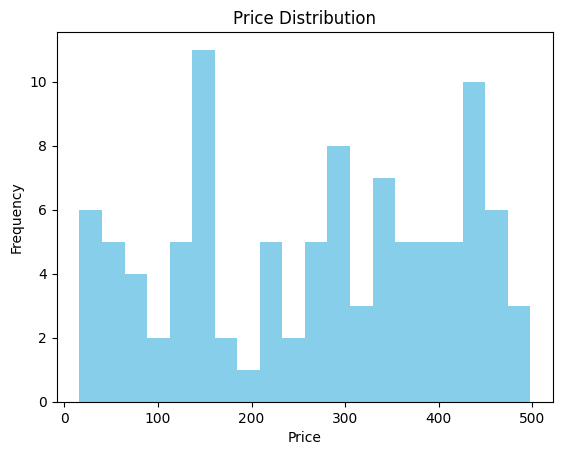

In [16]:
products['Price'].plot(kind='hist', bins=20, title='Price Distribution', color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [17]:
#For Transactions:
#Question: What is the total revenue generated?

In [18]:
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue}")


Total Revenue: $689995.56


In [19]:
#Question: Are there sales trends over time?

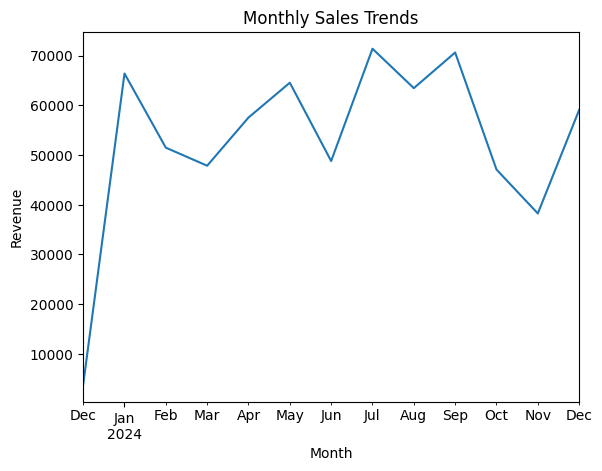

In [20]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


In [21]:
#INSIGHTS

In [24]:
#Insight 1: Regional Contribution

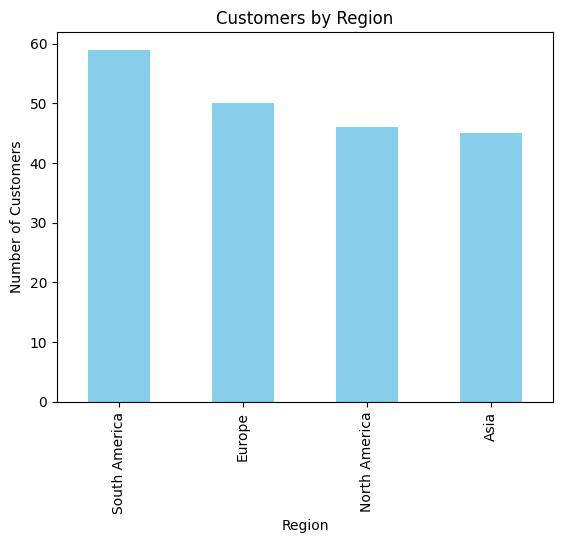

Top Region: South America with 59 customers.


In [25]:
# Count customers by region
region_counts = customers['Region'].value_counts()

# Plot the results
import matplotlib.pyplot as plt
region_counts.plot(kind='bar', title='Customers by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Print the most important region
print(f"Top Region: {region_counts.idxmax()} with {region_counts.max()} customers.")


In [26]:
#Insight 2:Product Performance

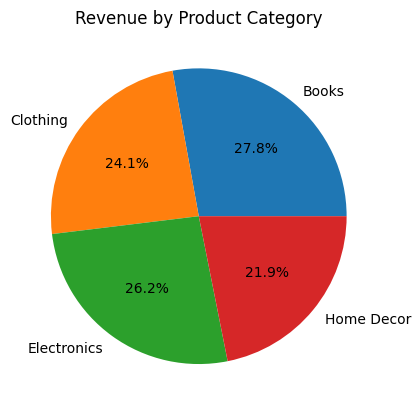

Top Category: Books with $192,147.47 in revenue.


In [27]:
# Merge transactions with products to get category information
transactions_products = transactions.merge(products, on='ProductID')

# Group by category and calculate total revenue
category_revenue = transactions_products.groupby('Category')['TotalValue'].sum()

# Plot the results
category_revenue.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Product Category')
plt.ylabel('')  # Hide y-axis label
plt.show()

# Print the most profitable category
print(f"Top Category: {category_revenue.idxmax()} with ${category_revenue.max():,.2f} in revenue.")


In [28]:
#Insight 3: Customer Growth

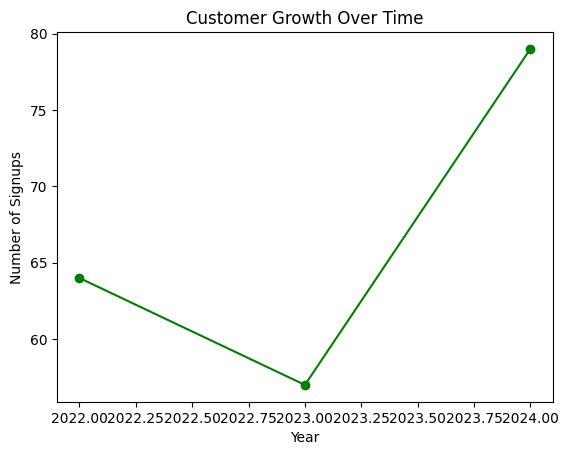

Customer Growth Over Time:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [29]:
# Convert signup date to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract year and count signups
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()

# Plot the results
signup_trends.plot(kind='line', marker='o', title='Customer Growth Over Time', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

# Print customer growth
print("Customer Growth Over Time:")
print(signup_trends)


In [30]:
#Insight 4: Sales Trends

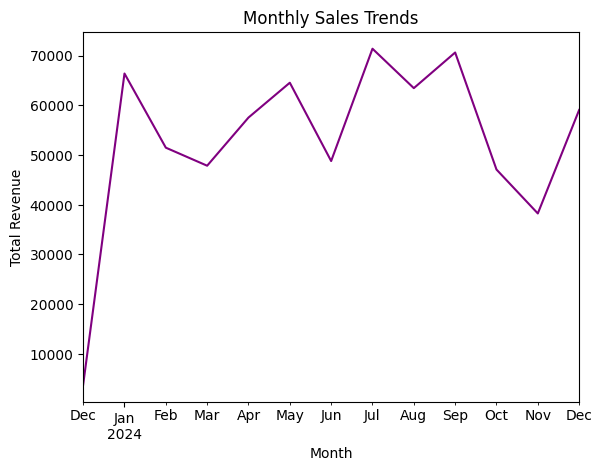

Highest Sales Month: 2024-07 with $71,366.39.


In [31]:
# Convert transaction date to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Group by month and calculate total sales
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot the results
monthly_sales.plot(title='Monthly Sales Trends', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Print the month with the highest sales
print(f"Highest Sales Month: {monthly_sales.idxmax()} with ${monthly_sales.max():,.2f}.")


In [32]:
#Insight 5: Customer Loyalty

In [33]:
# Identify repeat customers
repeat_customers = transactions.groupby('CustomerID')['TransactionID'].count() > 1
repeat_customer_ids = repeat_customers[repeat_customers].index

# Calculate revenue for repeat vs. one-time customers
repeat_revenue = transactions[transactions['CustomerID'].isin(repeat_customer_ids)]['TotalValue'].sum()
one_time_revenue = transactions[~transactions['CustomerID'].isin(repeat_customer_ids)]['TotalValue'].sum()

# Print results
print(f"Repeat Customers Revenue: ${repeat_revenue:,.2f}")
print(f"One-Time Customers Revenue: ${one_time_revenue:,.2f}")


Repeat Customers Revenue: $683,654.59
One-Time Customers Revenue: $6,340.97
